<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

**Loading MNIST dataset**

In [16]:
#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Preprocess MNIST Dataset**

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Loading custom dataset**

In [18]:
base_folder_path = '/content/drive/MyDrive/assignment_1_tme'
os.listdir(base_folder_path)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Preprocessing custom dataset**

In [19]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/assignment_1_tme'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.heic'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/assignment_1_tme/0
filename Screen Shot 2023-10-06 at 2.35.31 AM.png
filename Screen Shot 2023-10-06 at 2.39.38 AM.png
filename IMG_6165.png
/content/drive/MyDrive/assignment_1_tme/1
filename Screen Shot 2023-10-06 at 2.35.40 AM.png
filename Screen Shot 2023-10-06 at 2.39.45 AM.png
filename IMG_6166.png
/content/drive/MyDrive/assignment_1_tme/2
filename Screen Shot 2023-10-06 at 2.35.49 AM.png
filename Screen Shot 2023-10-06 at 2.39.54 AM.png
filename IMG_6167.png
/content/drive/MyDrive/assignment_1_tme/3
filename Screen Shot 2023-10-06 at 2.35.58 AM.png
filename Screen Shot 2023-10-06 at 2.40.02 AM.png
filename IMG_6168.png
/content/drive/MyDrive/assignment_1_tme/4
filename Screen Shot 2023-10-06 at 2.36.06 AM.png
filename Screen Shot 2023-10-06 at 2.40.08 AM.png
filename IMG_6169.png
/content/drive/MyDrive/assignment_1_tme/5
filename Screen Shot 2023-10-06 at 2.36.13 AM.png
filename Screen Shot 2023-10-06 at 2.40.15 AM.png
filename IMG_6170.png
/content/drive/M

In [20]:
custom_images

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [21]:
display_image = custom_images[3] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

**Merging MNIST and custom datasets**

In [22]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [23]:
display_image = x_train[-1] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

In [24]:
len(x_train),len(x_test)

(60030, 10000)

**Model Creation**

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

**Compile and train model**

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 72s 38ms/step - loss: 0.1450 - accuracy: 0.9549 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 2/10
1876/1876 [==============================] - 76s 41ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 3/10
1876/1876 [==============================] - 82s 44ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 4/10
1876/1876 [==============================] - 73s 39ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 5/10
1876/1876 [==============================] - 69s 37ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0350 - val_accuracy: 0.9904
Epoch 6/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0292 - val_accuracy: 0.9914
Epoch 7/10
1876/1876 [==============================] - 65s 34ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0360 -

**Plotting accuracy and validation accuracy scores**

313/313 - 3s - loss: 0.0605 - accuracy: 0.9869 - 3s/epoch - 8ms/step


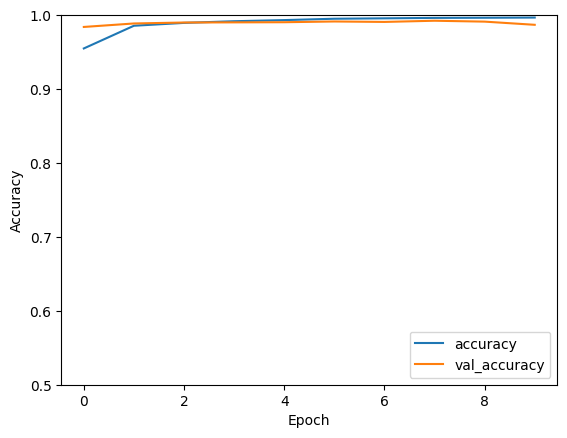

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [30]:
print(test_acc)

0.9868999719619751


**Model Overfitting**

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [34]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1876/1876 [==============================] - 46s 24ms/step - loss: 0.1503 - accuracy: 0.9555 - val_loss: 0.0568 - val_accuracy: 0.9808
Epoch 2/25
1876/1876 [==============================] - 51s 27ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0566 - val_accuracy: 0.9805
Epoch 3/25
1876/1876 [==============================] - 67s 36ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 4/25
1876/1876 [==============================] - 47s 25ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0461 - val_accuracy: 0.9855
Epoch 5/25
1876/1876 [==============================] - 45s 24ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 6/25
1876/1876 [==============================] - 61s 33ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 7/25
1876/1876 [==============================] - 60s 32ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0570 -

**At 11th Epoch, the validation accuracy reaches highest value of 98.85%. Later on, the value decreases. Therefore, the model overfits at 11 Epoch**

313/313 - 2s - loss: 0.0991 - accuracy: 0.9842 - 2s/epoch - 6ms/step


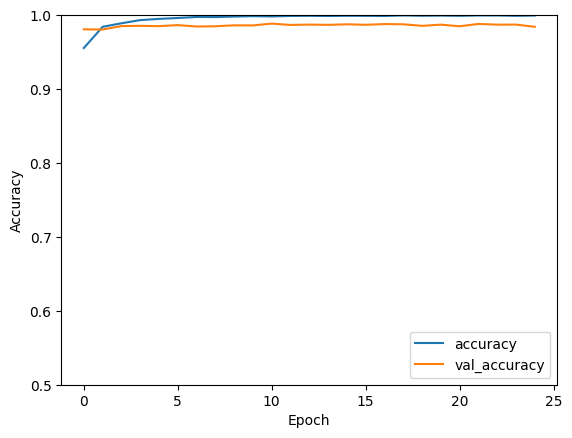

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [36]:

print(test_acc)

0.9842000007629395


**experiment with 3 different configuration**

**Configuration 1**





In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1876/1876 [==============================] - 48s 25ms/step - loss: 0.1452 - accuracy: 0.9564 - val_loss: 0.0602 - val_accuracy: 0.9807
Epoch 2/10
1876/1876 [==============================] - 47s 25ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0436 - val_accuracy: 0.9850
Epoch 3/10
1876/1876 [==============================] - 44s 24ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0513 - val_accuracy: 0.9839
Epoch 4/10
1876/1876 [==============================] - 44s 23ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 5/10
1876/1876 [==============================] - 45s 24ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 6/10
1876/1876 [==============================] - 44s 24ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 7/10
1876/1876 [==============================] - 45s 24ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0492 - val_accura

313/313 - 2s - loss: 0.0634 - accuracy: 0.9858 - 2s/epoch - 6ms/step


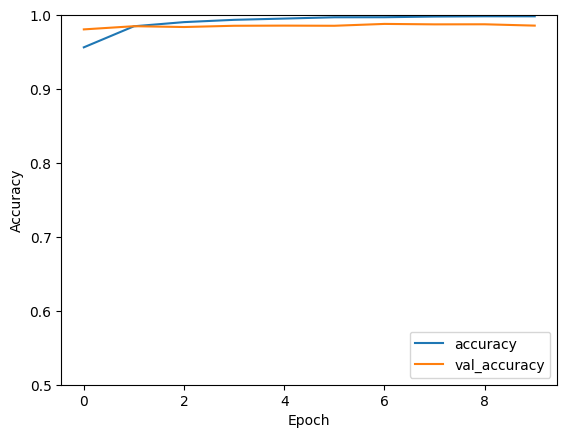

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [42]:
print(test_acc)

0.98580002784729


**Configuration 2**

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               991360    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1876/1876 [==============================] - 83s 43ms/step - loss: 0.1161 - accuracy: 0.9646 - val_loss: 0.0543 - val_accuracy: 0.9817
Epoch 2/10
1876/1876 [==============================] - 85s 45ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0374 - val_accuracy: 0.9873
Epoch 3/10
1876/1876 [==============================] - 83s 44ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0325 - val_accuracy: 0.9889
Epoch 4/10
1876/1876 [==============================] - 82s 44ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0337 - val_accuracy: 0.9892
Epoch 5/10
1876/1876 [==============================] - 82s 44ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 6/10
1876/1876 [==============================] - 82s 44ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 7/10
1876/1876 [==============================] - 79s 42ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0392 -

313/313 - 4s - loss: 0.0390 - accuracy: 0.9899 - 4s/epoch - 12ms/step


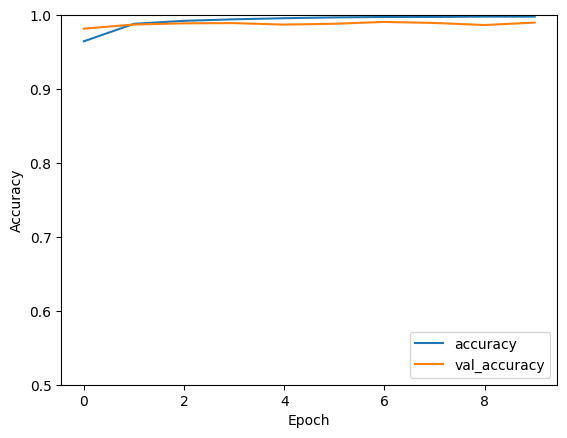

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [48]:
print(test_acc)

0.9898999929428101


**Configuration 3**

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 74s 39ms/step - loss: 0.1360 - accuracy: 0.9579 - val_loss: 0.0404 - val_accuracy: 0.9873
Epoch 2/10
1876/1876 [==============================] - 69s 37ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0298 - val_accuracy: 0.9894
Epoch 3/10
1876/1876 [==============================] - 71s 38ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 4/10
1876/1876 [==============================] - 77s 41ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0276 - val_accuracy: 0.9915
Epoch 5/10
1876/1876 [==============================] - 73s 39ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0287 - val_accuracy: 0.9908
Epoch 6/10
1876/1876 [==============================] - 71s 38ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0294 - val_accuracy: 0.9918
Epoch 7/10
1876/1876 [==============================] - 69s 37ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0367 -

313/313 - 3s - loss: 0.0369 - accuracy: 0.9917 - 3s/epoch - 8ms/step


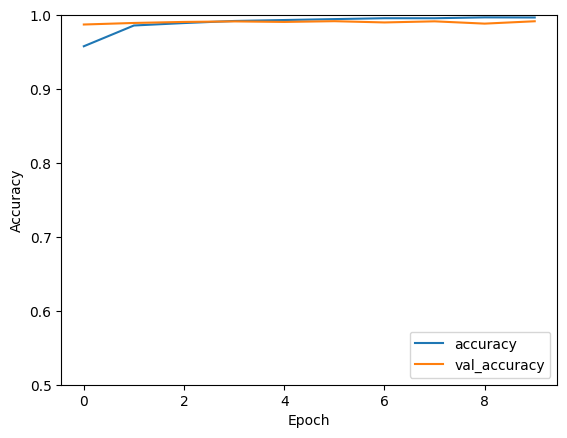

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [54]:
print(test_acc)

0.9916999936103821


**Create a custom test set**

In [60]:
custom_test_images = []
custom_test_labels = []
base_folder_path = '/content/drive/MyDrive/Assignment_1_TME_test'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.heic'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_test_images.append(img_array)
              custom_test_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)

/content/drive/MyDrive/Assignment_1_TME_test/1
filename Screen Shot 2023-10-06 at 8.40.09 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/0
filename Screen Shot 2023-10-06 at 8.39.39 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/8
filename Screen Shot 2023-10-06 at 8.41.17 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/7
filename Screen Shot 2023-10-06 at 8.41.10 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/6
filename Screen Shot 2023-10-06 at 8.41.03 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/5
filename Screen Shot 2023-10-06 at 8.40.54 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/4
filename Screen Shot 2023-10-06 at 8.40.47 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/3
filename Screen Shot 2023-10-06 at 8.40.38 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/2
filename Screen Shot 2023-10-06 at 8.40.30 AM.png
/content/drive/MyDrive/Assignment_1_TME_test/9
filename Screen Shot 2023-10-06 at 8.41.23 AM.png


In [61]:
custom_test_labels, len(custom_test_labels)

(array([1, 0, 8, 7, 6, 5, 4, 3, 2, 9]), 10)

In [62]:
custom_test_pred=model.predict(custom_test_images)

1/1 [==============================] - 0s 25ms/step


**Generate classifications**

In [63]:
for i in range(len(custom_test_pred)):
  print(custom_test_labels[i],np.argmax(custom_test_pred[i]))

1 7
0 0
8 8
7 7
6 6
5 5
4 5
3 3
2 2
9 5
